In [1]:
import sys
sys.path.append('../')

import numpy as np

from helper import *

In [2]:
from tqdm import tqdm

def research_minibatch_calculation(n_tests=1):
    results = []

    real_weight, real_bias = 2, 0

    dots_count = 500
    variance = 0.5
    X = np.random.rand(dots_count, 1)
    y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)
    loss_real = minibatch(X, y).get_loss_history([[real_weight]])[-1]

    for i in tqdm(range(1, X.shape[0] + 1)):
        count_sum = 0
        for j in range(n_tests):
            sgd = minibatch(X, y, batch_size=i)
            loss_real = sgd.get_loss_history([[real_weight]])[-1]
            result = sgd.gradient_descent(np.array([0], float), max_epochs=10000, initial_lr=0.001, eps=loss_real+(loss_real), apply_min=True, apply_value=True)
            count_sum += len(result)
        results.append(count_sum / n_tests)
    
    return results

In [3]:
def research_minibatch_view(results):

    # График n_epochs
    plt.plot(range(1, len(results)+1), results, marker='o', label='Minibatch GD')
    plt.xlabel('Batch size')
    plt.ylabel('n epochs')
    plt.legend()

    plt.show()

In [4]:
results = research_minibatch_calculation(n_tests=10)

100%|██████████| 500/500 [00:38<00:00, 12.85it/s]


In [5]:
print(results)

[3059.0, 1232.3, 783.2, 571.9, 453.6, 375.2, 318.1, 276.6, 246.4, 221.8, 200.2, 184.6, 168.2, 156.6, 146.3, 136.7, 129.0, 121.2, 115.6, 109.1, 104.3, 99.4, 95.2, 90.9, 87.6, 83.9, 80.5, 77.5, 75.3, 72.8, 70.4, 69.0, 66.2, 65.0, 62.4, 60.8, 59.1, 58.0, 56.3, 55.2, 53.1, 52.2, 51.2, 49.9, 48.6, 48.0, 46.3, 46.0, 45.2, 44.0, 42.8, 42.3, 41.4, 40.6, 40.3, 39.8, 38.7, 38.0, 37.0, 36.7, 35.7, 35.9, 35.1, 34.7, 34.0, 33.5, 33.1, 32.7, 32.0, 31.8, 31.6, 30.9, 30.3, 29.8, 29.7, 29.3, 28.8, 28.6, 27.6, 27.7, 27.2, 27.3, 26.8, 26.5, 26.5, 25.7, 25.4, 25.2, 25.1, 24.9, 24.4, 24.2, 23.9, 23.8, 23.6, 23.2, 23.1, 22.7, 22.7, 22.2, 22.2, 21.9, 21.7, 21.5, 21.3, 21.2, 21.0, 20.8, 20.9, 20.5, 20.1, 19.9, 20.0, 19.8, 19.6, 19.4, 19.3, 19.0, 19.0, 19.1, 18.9, 18.3, 18.4, 18.3, 18.0, 18.0, 17.9, 17.6, 17.4, 17.5, 17.3, 17.0, 17.0, 17.0, 17.0, 16.8, 16.8, 16.6, 16.3, 16.1, 16.0, 16.0, 16.0, 15.6, 15.7, 15.9, 15.6, 15.3, 15.4, 15.1, 15.0, 15.0, 15.1, 15.0, 14.9, 14.6, 14.6, 14.5, 14.3, 14.1, 14.0, 14.2, 14.0

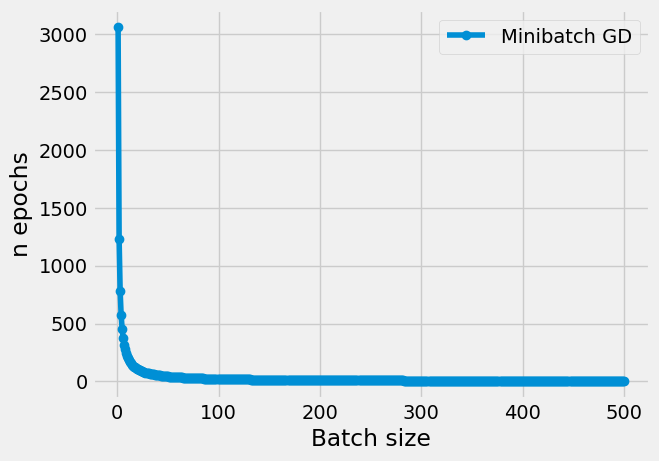

In [6]:
research_minibatch_view(results)